# Machine Learning Online Class Exercise 8 | Anomaly Detection and Collaborative Filtering

In [1]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
from numpy import linalg

from scipy.io import loadmat

## Part 1: Load Example Dataset

We start this exercise by using a small dataset that is easy to
visualize.

Our example case consists of 2 network server statistics across
several machines: the latency and throughput of each machine. This
exercise will help us find possibly faulty (or very fast) machines.

In [2]:
data1 = loadmat('ex8data1.mat')
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

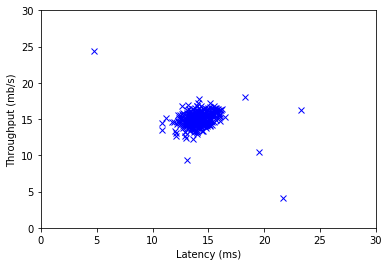

In [3]:
# Visualizing example dataset for outlier detection.

plt.plot(X[:, 0], X[:, 1], 'bx');
plt.axis([0, 30, 0, 30]);
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');

# Part 2: Estimate the dataset statistics

For this exercise, we assume a Gaussian distribution for the dataset.

We first estimate the parameters of our assumed Gaussian distribution,
then compute the probabilities for each of the points and then
visualize both the overall distribution and where each of the points
falls in terms of that distribution.

In [4]:
def multivariate_gaussian(X, mu, sigma2):
    '''Computes the probability density function of the multivariate gaussian distribution.'''
    k = mu.shape[0]
    if len(sigma2.shape)== 1 or sigma2.shape[0] == 1:
        sigma2 = np.diag(sigma2)
    X -= mu.T

    return np.power((2 * np.pi), (-k / 2.0)) * np.power(linalg.det(sigma2), -.5) * \
            np.exp(-.5  * np.sum(X.dot(linalg.pinv(sigma2)) * X, axis=1))


In [5]:
def estimate_gaussian(X):
    '''This function estimates the parameters of a Gaussian distribution using the data in X'''
    m, n = X.shape
    mu = np.sum(X, axis=0) / m
    sigma = np.var(X, axis=0)
    
    return mu, sigma

In [6]:
def visulize_fit(X, mu, sigma2):
    '''Visualize the dataset and its estimated distribution.'''
    X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    Z = multivariate_gaussian(np.vstack([X1.flat, X2.flat]).T, mu, sigma2).reshape(X1.shape)
    plt.plot(X[:, 0], X[:, 1], 'bx')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    
    if np.all(np.isinf(Z) == 0):
        plt.contour(X1, X2, Z, np.power(10.0, np.arange(-20, 0, 3).T))

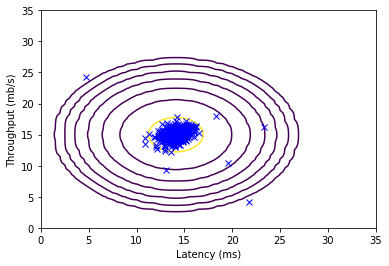

In [7]:
mu, sigma2 = estimate_gaussian(X)

visulize_fit(X, mu, sigma2)

# Part 3: Find Outliers

Now you will find a good epsilon threshold using a cross-validation
set probabilities given the estimated Gaussian distribution

In [8]:
def select_threadhold(yval, pval):
    '''Find the best threshold (epsilon) to use for selecting.'''
    best_epsilon = 0
    best_F1 = 0
    pval_max = max(pval)
    pval_min = min(pval)
    step_size = (pval_max - pval_min) / 1000.0

    for epsilon in np.arange(pval_min, pval_max, step_size):
        cv_pred = pval < epsilon
        tp = sum((cv_pred == 1) & (yval == 1))
        fp = sum((cv_pred == 1) & (yval == 0))
        fn = sum((cv_pred == 0) & (yval == 1))
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        F1 = (2 * precision * recall) / (precision + recall)

        if F1 > best_F1:
            best_epsilon = epsilon
            best_F1 = F1
        
    return best_epsilon, best_F1

In [9]:
pval = multivariate_gaussian(np.copy(Xval), mu, sigma2)
epsilon, F1 = select_threadhold(yval.flatten(), pval)

print(f'''Best epsilon found using cross-validation: {epsilon}
Best F1 on Cross Validation Set: {F1}
(you should see a value epsilon of about 8.99e-05)
''')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001
(you should see a value epsilon of about 8.99e-05)



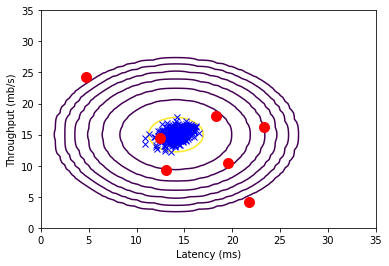

In [10]:
# Find the outliers in the training set and plot the
outliners = np.where(pval < epsilon)

visulize_fit(X, mu, sigma2)
# Draw a red circle around those outliers
plt.plot(X[outliners, 0], X[outliners, 1], 'ro', linewidth=2, markersize=10);

# Part 4: Multidimensional Outliers

We will now use the code from the previous part and apply it to a
harder problem in which more features describe each datapoint and only
some features indicate whether a point is an outlier.

In [11]:
data2 = loadmat('ex8data2.mat')
X = data2['X']
Xval = data2['Xval']
yval = data2['yval']

In [12]:
# Apply the same steps to the larger dataset
mu, sigma2 = estimate_gaussian(X)

# Training set
p = multivariate_gaussian(X, mu, sigma2)

# Cross-validation set
pval = multivariate_gaussian(Xval, mu, sigma2)

# Find the best threshold
epsilon, F1 = select_threadhold(yval.flatten(), pval)

print(f'''Best epsilon found using cross-validation: {epsilon}
Best F1 on Cross Validation Set: {F1}
# Outliers found: {np.sum(p < epsilon)}
   (you should see a value epsilon of about 1.38e-18)''')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Best epsilon found using cross-validation: 1.377228890761358e-18
Best F1 on Cross Validation Set: 0.6153846153846154
# Outliers found: 117
   (you should see a value epsilon of about 1.38e-18)
